In [4]:
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from sklearn import metrics

import numpy as np

# load dataset
data = read_csv('d:gli\ml-data\pima-indians-diabetes.data', header=None)
values = data.values


In [5]:
# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model = DecisionTreeClassifier()
	model.fit(train[:,:-1], train[:,-1])
    # evaluate model
	predictions = model.predict(test[:,:-1])
	score = accuracy_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
#	print(score)
	stats.append(score)

In [2]:
# configure bootstrap
n_iterations = 5000        # Number of bootstrap samples to create
n_size = int(len(data) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model = DecisionTreeClassifier()
	model.fit(train[:,:-1], train[:,-1])
    # evaluate model
	predictions = model.predict(test[:,:-1])
	score = metrics.recall_score(test[:,-1], predictions, pos_label=1)   # by default for class lable 1 which is diabetic

#	score = accuracy_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
#	print(score)
	stats.append(score)


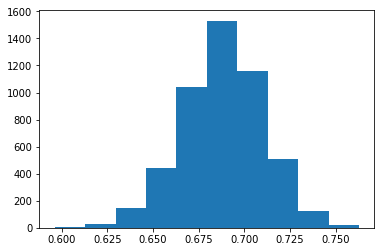

75.0
7500.0 confidence interval 67.4% and 70.3%


In [9]:
# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
cl = 0.50                            # for 95% confidence 
p = (1 -cl)/2.0 * 100                # tail regions on right and left .25 on each side indicated by P value (border)
       

lower = max(0.0, np.percentile(stats, p))   # setting the lower confidence boundary
p = (cl+((1.0-cl)/2.0)) * 100
print(p)
upper = min(1.0, np.percentile(stats, p))   # setting the higer confidence boundary
print('%.1f confidence interval %.1f%% and %.1f%%' % (p*100, lower*100, upper*100))